In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils.general import aggregate_results, merge_with_model_details
%load_ext autoreload

directory = "metric_results"
filename = "metrics_corpus"
filetype = ".csv"

# Load data
df = aggregate_results(directory, filename, filetype)
df["seed"] = df["seed"].fillna(1234)
df = merge_with_model_details(df, "config/model_details.yaml")
assert df.architecture.isna().sum() == 0

df["dataset"] = df["dataset"].str.replace("CQADupstackEnglishRetrieval", "DupstackEnglish")

df["log_sample_size"] = np.log(df["sample_size"])
df = df.reset_index(drop=True)
print(df.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded dataframe with shape:  (9235, 63)
(9127, 78)


### Robustness across sample size + seeds

/tmp/ipykernel_1661122/1312772869.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  g = sns.pointplot(data=subset,


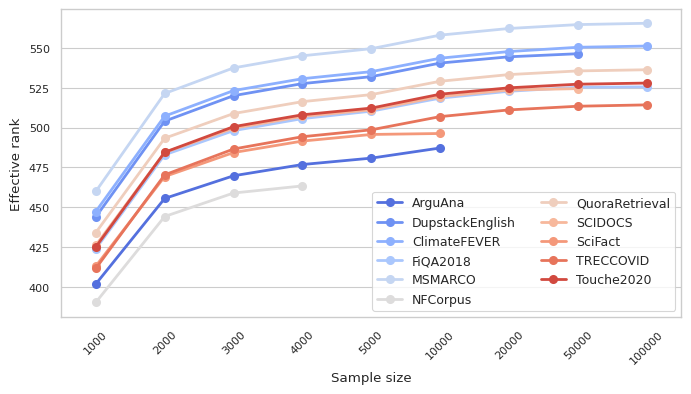

In [4]:
metric = "effective_rank"
min_sample_size = 1000
subset = df[(~df[metric].isna()) 
            & (df["sample_size"] >= min_sample_size) 
            & (df["model"] == "intfloat/multilingual-e5-large-instruct")
            ]


sns.set(style="whitegrid", context="paper", font_scale=1)
plt.gcf().set_size_inches(8, 4)
g = sns.pointplot(data=subset, 
                  x="sample_size", 
                  y=metric, 
                  hue="dataset",
                  linewidth=2,
                  errorbar=('ci', 95),
                  errwidth=2,
                  palette="coolwarm")

plt.xticks(rotation=45)
plt.ylabel(f"Effective rank")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Sample size")
plt.legend(loc='lower right', fontsize=9, ncol=2)  # Adjusted position
plt.savefig("figures/scaling_rank.pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Time scaling

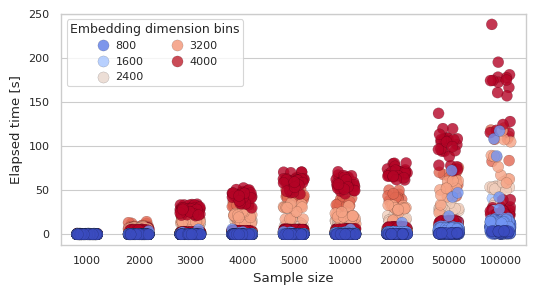

In [5]:
metric = "effective_rank"
min_sample_size = 1000
subset = df[(~df[metric].isna()) & (df["sample_size"] >= min_sample_size)]
subset = subset[subset["elapsed_time_effective_rank"] < 700]


bi_palette = sns.color_palette(["#08312A", 
                                "#00E47C", 
                                "#ffd03d",
                                "#6ad2e2",
                                "#ee6541",
                                "#928bde",
                                "#86251b",
                                "#076d7e",
                                "#e18600"], desat=0.7)

sns.stripplot(data=subset, 
              x="sample_size", 
              y=f"elapsed_time_{metric}", 
              palette="coolwarm",
              hue="embedding_dimension", 
              alpha=0.8, 
              edgecolor="black",
              linewidth=0.1,  
              s=8, jitter=0.2)
plt.gcf().set_size_inches(6, 3)
plt.ylabel(f"Elapsed time [s]")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Sample size")
plt.legend(title="Embedding dimension bins", loc='upper left', ncol=2, handletextpad=0.1, borderpad=0.3, 
           fontsize=8, title_fontsize=9) #
plt.savefig("figures/scaling_compute.pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)